In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

#Load text file 

def load_log(file):
    results = []
    with open(file) as f:
        for line in f:
            if '* Prec@1' in line: 
                line = line.split()
                results.append(float(line[-1]))
    return results

In [2]:
shows = {}
#shows['vgg11_bn'] = load_log('log_vgg11_bn')
#shows['vgg11_half_bn'] = load_log('log_half_vgg11_bn')

shows['vgg16_bn'] = load_log('log_vgg16_bn')
#shows['vgg13_bn'] = load_log('log_vgg13_bn')
#shows['vgg13_half_bn'] = load_log('log_half_vgg13_bn')

In [3]:
print(shows)

{'vgg16_bn': [13.281, 13.281, 11.328, 9.375, 10.469, 17.695, 15.859, 19.297]}


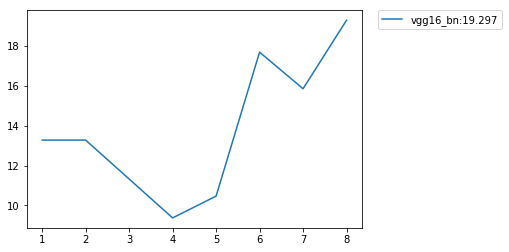

In [4]:
for key in sorted(shows.keys()):
    epochs = np.arange(1, 1+len(shows[key]))
    plt.plot(epochs, shows[key], label='{}:{}'.format(key, np.max(shows[key])))
    

#plt.legend(shows.keys(), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)